# Analyzing Bank Marketing Campaign

The scope of the marketing campaign is selling long-term deposits. For each call,
information about the client and the outcome of the call is registered. For instance,
client information contains family and education status and the client's current
financial situation (the data is anonymized). Information about the last call from the
previous marketing campaign is also registered.

### import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Exploring the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

#### Exploring the The numerical features

In [6]:
numerical_features = df.select_dtypes(include='number').columns.to_list()
numerical_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [7]:
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


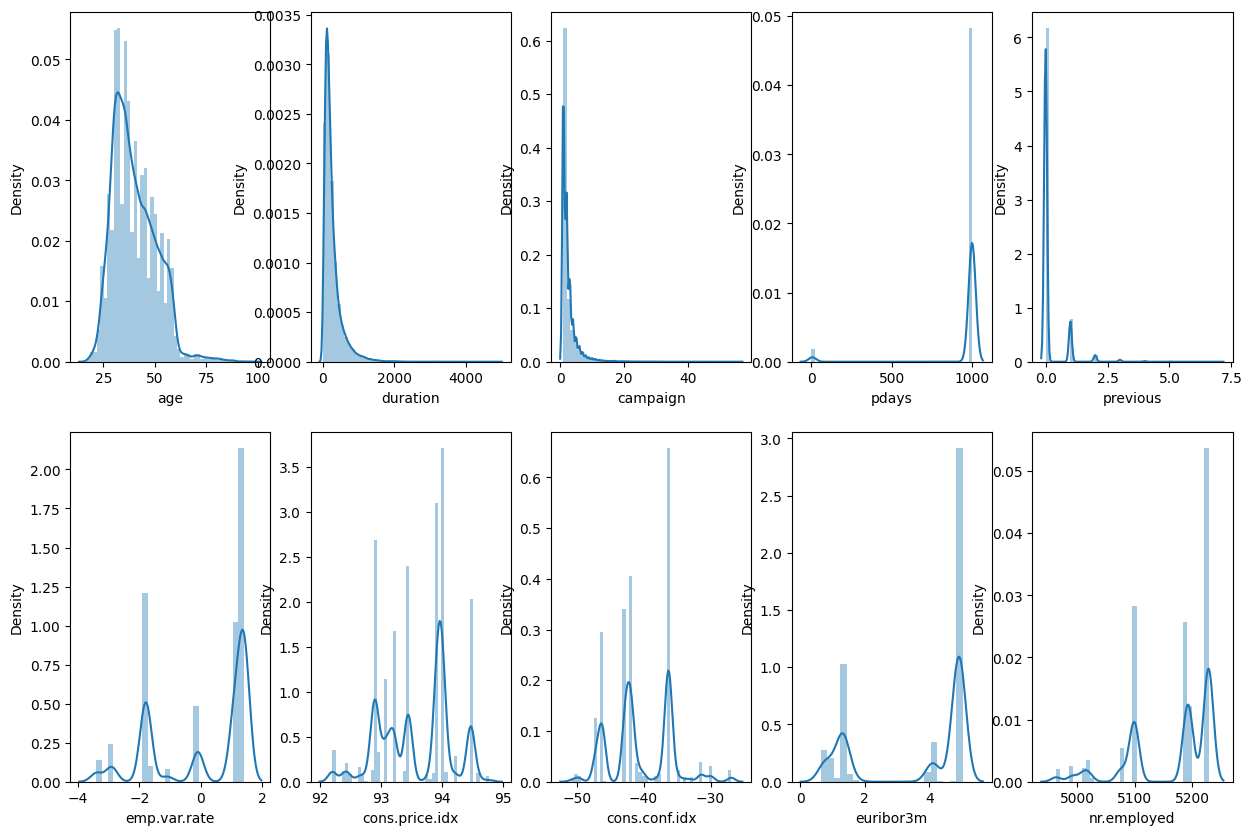

In [8]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_features):
    plt.subplot(2,5,i+1)
    sns.distplot(df[col])


From the preceding plot, we can see that, besides the age and duration columns,
the rest of the numerical features do not seem to have a regular distribution of values
since their distributions seem scattered and only a few values are present.

#### Exploring the The categorical features

In [9]:
category_features = df.select_dtypes(include='object').columns.to_list()
category_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [10]:
df[category_features].describe().T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


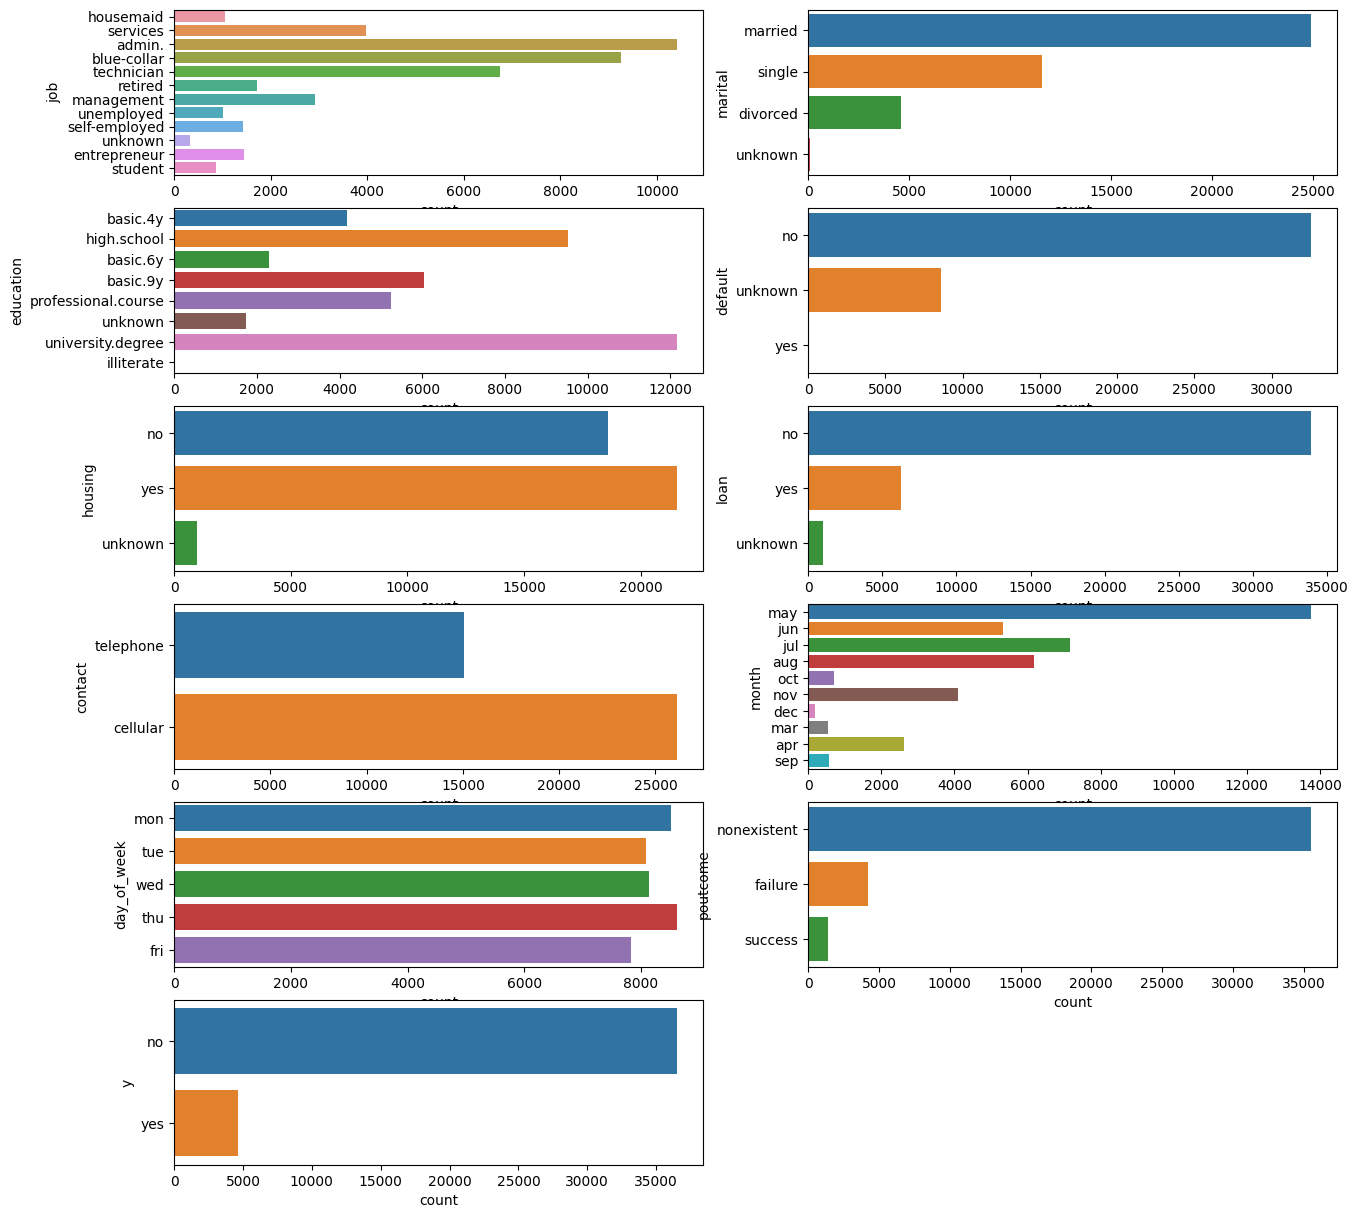

In [11]:
plt.figure(figsize=(15,15))
for i,col in enumerate(category_features):
    plt.subplot(6,2,i+1)
    ax = sns.countplot(y=col, data=df)
    ax.set_xlabel("count")
    ax.set_ylabel(col)


In [12]:
# the percentage of the target variable
t1,t2=round(df['y'].value_counts(normalize=True)*100,2)
print(f'The percentage of the no variable {t1}%\nThe percentage of the yes variable {t2}%')

The percentage of the no variable 88.73%
The percentage of the yes variable 11.27%


From the preceding output, we can derive that only 11% of the contacted customers
decided to accept the offer from the bank and subscribe to the long-term deposit.


This is a very important insight since it means that the data is imbalanced and we
need to take this into account when we build our model.

#### Impact of Numerical Features on the Outcome

we will analyze the relationship between the numerical features
and the outcome of a marketing campaign, which is identified in the
y column in the banking dataset.

Question:

**Is there a statistically significant difference in numerical features for successful and non-successful
marketing campaigns?**

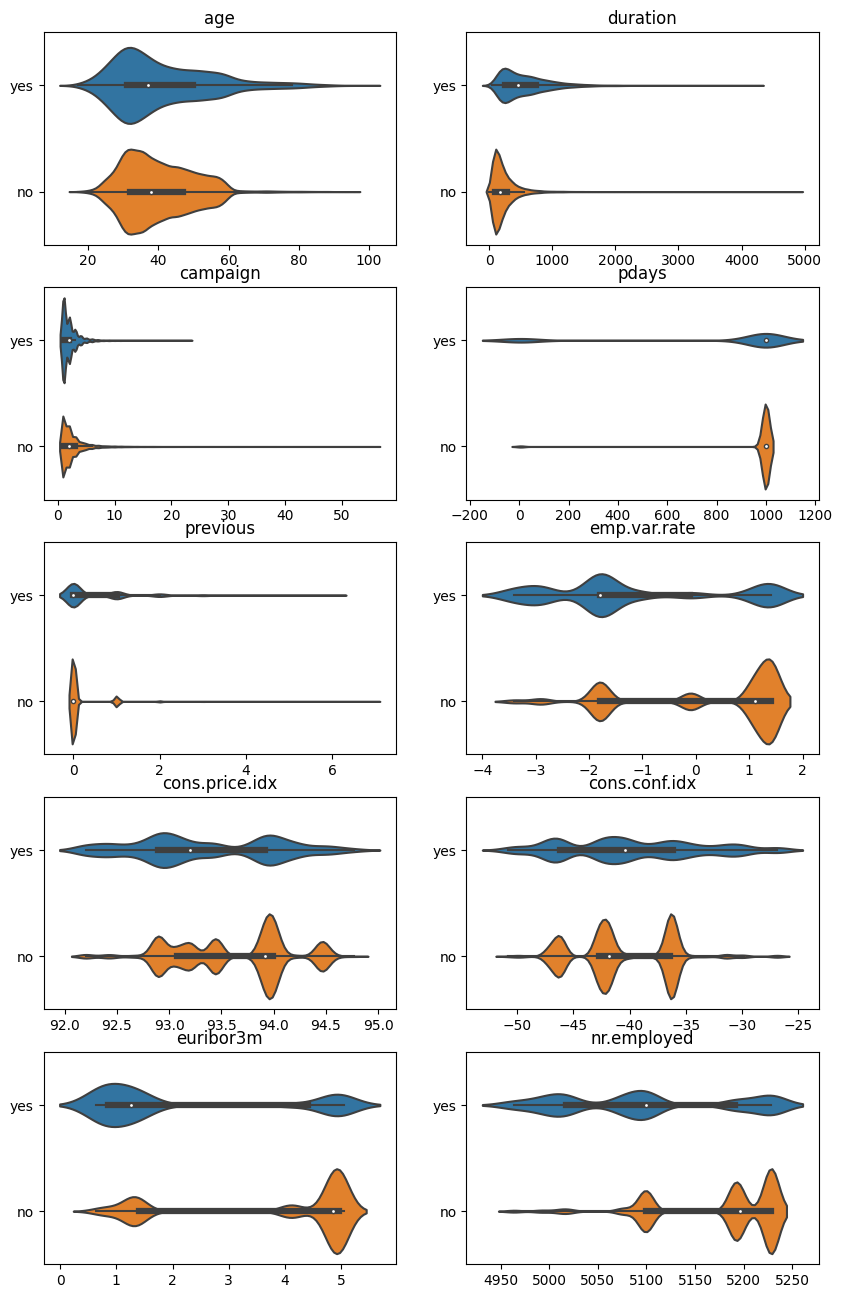

In [13]:
plt.figure(figsize=(10,16))
for i,col in enumerate(numerical_features):
    plt.subplot(5,2,i+1)
    sns.violinplot(x=col, y='y', data=df,order=['yes','no'])
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')


We can assess this difference from a statistical perspective by running a hypothesis test
on each of the numerical features, in which we will test whether the average value of
the respective numerical feature is different for "yes" entries for the y column against
"no" entries for each numerical feature.

In [14]:
from scipy.stats import ttest_ind

def test_means(data,col):
    '''
    data: dataframe 
    col: column name
    return: list of column name, mean of yes, mean of no, t and p values
    
    This function takes a dataframe and a column name and returns 
    the mean of yes and no values and t and p values of the t-test.
    
    '''
    yes_mask = data['y'] == 'yes'
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]
    mean_yes = np.mean(values_yes)
    mean_no = np.mean(values_no)
    ttest_res = ttest_ind(values_yes, values_no)
    return [col, mean_yes, mean_no,round(ttest_res[0], 4), round(ttest_res[1],4)]

In [15]:
test_df = pd.DataFrame(columns=["column", "mean yes", "mean no", "ttest stat", "ttest pval"])

"""
for each column in the numerical_features, compute means and test
statistics and fill the values in the dataframe
"""
for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_means(df, col)
test_df

,column,mean yes,mean no,ttest stat,ttest pval
0,age,40.913147,39.911185,6.1721,0.0
1,duration,553.191164,220.844807,89.9672,0.0
2,campaign,2.051724,2.633085,-13.4965,0.0
3,pdays,792.035560,984.113878,-69.7221,0.0
4,previous,0.492672,0.132374,48.0027,0.0
5,emp.var.rate,-1.233448,0.248875,-63.4337,0.0
6,cons.price.idx,93.354386,93.603757,-27.9032,0.0
7,cons.conf.idx,-39.789784,-40.593097,11.1539,0.0
8,euribor3m,2.123135,3.811491,-65.6466,0.0
9,nr.employed,5095.115991,5176.166600,-76.9845,0.0


there is a statistically significant difference in
the mean values for each of the numerical columns (the results from the p-value in
the ttest pval column). This means that for each of the numerical features, the
average value for successful marketing campaigns is significantly different than the
average value for unsuccessful marketing campaigns.

In [16]:
from scipy.stats import ks_2samp

def ks_means(data,col):
    '''
    data: dataframe 
    col: column name
    return: t,p
    
    This function takes a dataframe and a column name and returns 
    the ks test statistics and p values of the ks-test.    
    '''
    yes_mask = data['y'] == 'yes'
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]
    ks_test = ks_2samp(values_yes, values_no)
    return [col,round(ks_test[0], 4), round(ks_test[1],4)]

In [17]:
test_df_ks = pd.DataFrame(columns=["column", "ks stat", "ks pval"])

"""
for each column in the numerical_features, compute ks test
statistics and fill the values in the dataframe
"""
for index, col in enumerate(numerical_features):
    test_df_ks.loc[index] = ks_means(df, col)
test_df_ks


,column,ks stat,ks pval
0,age,0.0861,0.0
1,duration,0.4641,0.0
2,campaign,0.0808,0.0
3,pdays,0.1934,0.0
4,previous,0.2102,0.0
5,emp.var.rate,0.4324,0.0
6,cons.price.idx,0.2281,0.0
7,cons.conf.idx,0.1998,0.0
8,euribor3m,0.4326,0.0
9,nr.employed,0.4324,0.0


<Figure size 1000x1000 with 0 Axes>

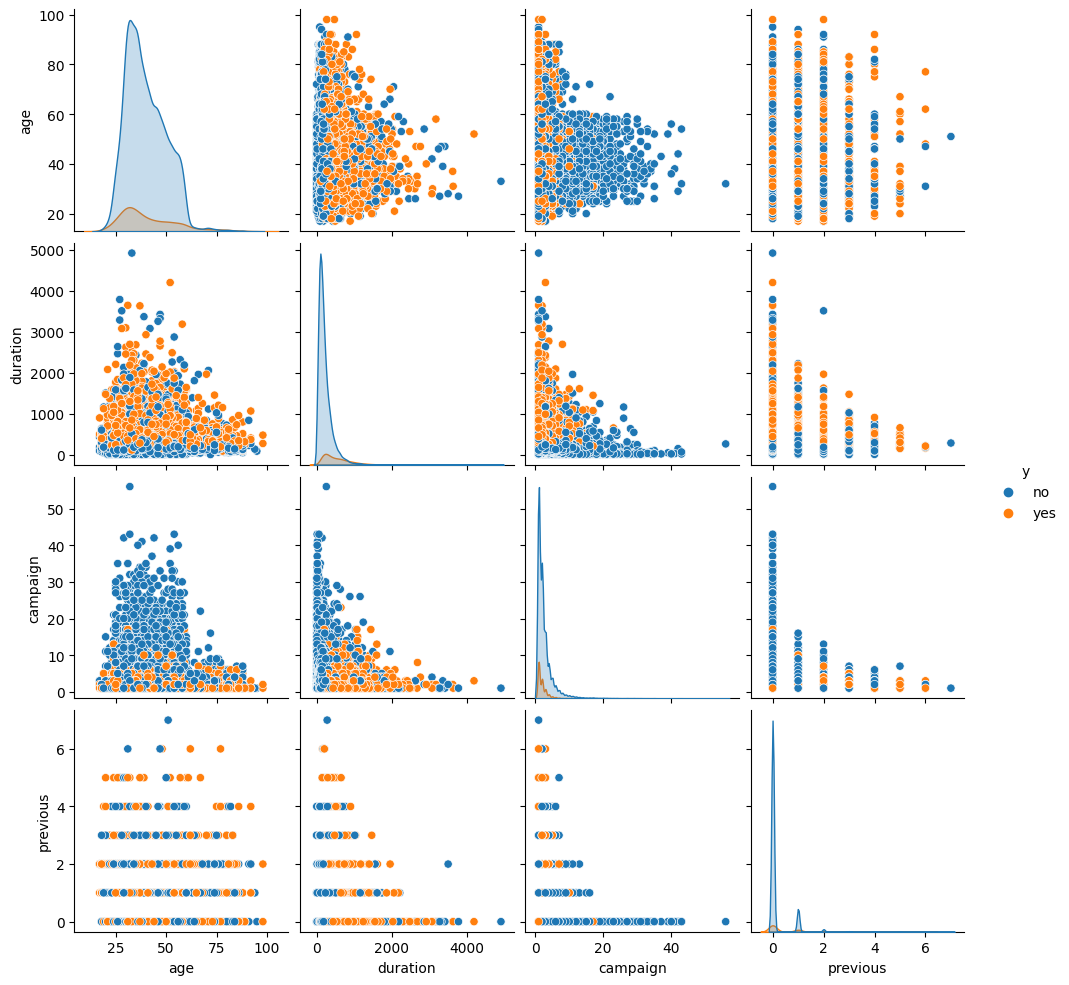

In [18]:
campaign_columns = ['age','duration','campaign','previous']
financial_columns = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

plot_df = df[campaign_columns + ['y']]  
plt.figure(figsize=(10,10))
sns.pairplot(plot_df, hue='y')

<Figure size 1000x1000 with 0 Axes>

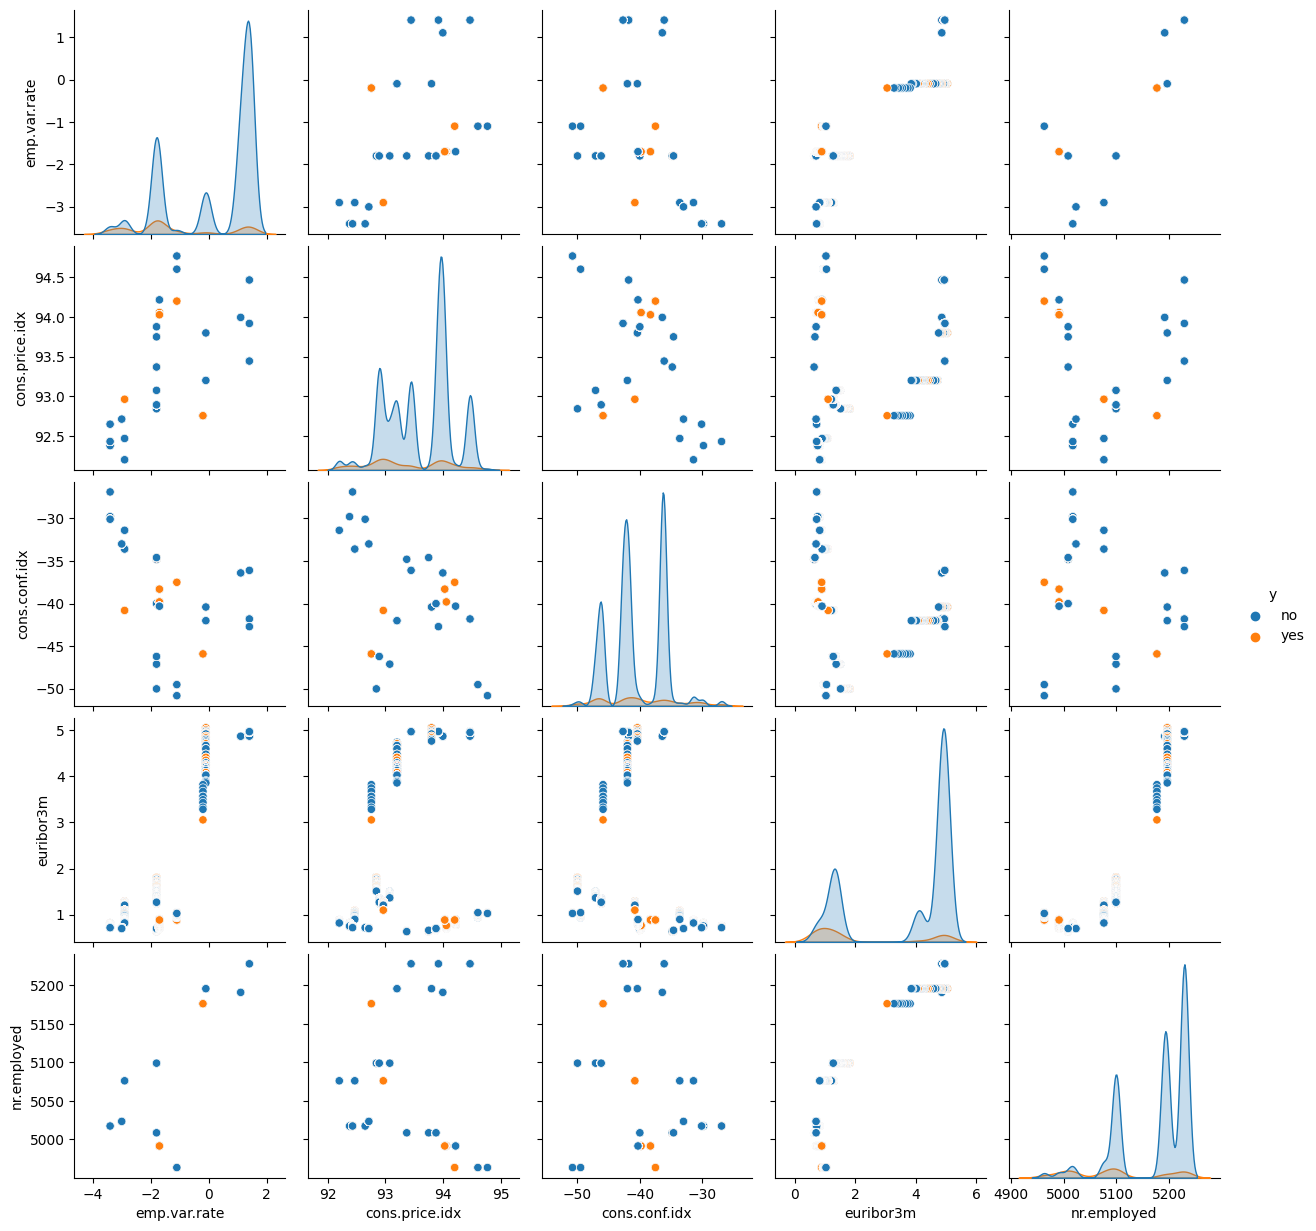

In [19]:
plot_df = df[financial_columns + ['y']]
plt.figure(figsize=(10,10))
sns.pairplot(plot_df, hue='y')

In [20]:
successful_calls = df.y == "yes"
# plot correlation matrix for successful calls
plot_data = df[campaign_columns + financial_columns][successful_calls]
successful_corr = plot_data.corr()
successful_corr.style.background_gradient()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.059319,-0.007920,0.074937,-0.081579,-0.024695,0.141166,-0.085403,-0.111972
duration,-0.059319,1.000000,0.156859,-0.231527,0.503056,0.237558,-0.143827,0.499710,0.481981
campaign,-0.007920,0.156859,1.000000,-0.104093,0.221760,0.116511,-0.042858,0.211863,0.202677
previous,0.074937,-0.231527,-0.104093,1.000000,-0.284754,0.091215,0.127833,-0.391993,-0.488325
emp.var.rate,-0.081579,0.503056,0.221760,-0.284754,1.000000,0.660341,-0.267241,0.926117,0.787633
cons.price.idx,-0.024695,0.237558,0.116511,0.091215,0.660341,1.000000,-0.328344,0.414585,0.119655
cons.conf.idx,0.141166,-0.143827,-0.042858,0.127833,-0.267241,-0.328344,1.000000,-0.120171,-0.203270
euribor3m,-0.085403,0.499710,0.211863,-0.391993,0.926117,0.414585,-0.120171,1.000000,0.922214
nr.employed,-0.111972,0.481981,0.202677,-0.488325,0.787633,0.119655,-0.203270,0.922214,1.000000


In [21]:
unsuccessful_calls = df.y == "no"
# plot correlation matrix for unsuccessful calls
plot_data = df[campaign_columns + financial_columns][unsuccessful_calls]
unsuccessful_corr = plot_data.corr()
unsuccessful_corr.style.background_gradient()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.000803,0.008376,-0.003035,0.026783,0.011444,0.124678,0.041400,0.017729
duration,0.000803,1.000000,-0.083308,-0.004271,0.003485,0.017708,0.004219,0.006484,-0.004371
campaign,0.008376,-0.083308,1.000000,-0.067808,0.132845,0.123263,-0.007145,0.115355,0.126320
previous,-0.003035,-0.004271,-0.067808,1.000000,-0.424785,-0.271909,-0.139020,-0.442356,-0.463325
emp.var.rate,0.026783,0.003485,0.132845,-0.424785,1.000000,0.797180,0.319209,0.975955,0.921768
cons.price.idx,0.011444,0.017708,0.123263,-0.271909,0.797180,1.000000,0.152283,0.730782,0.593635
cons.conf.idx,0.124678,0.004219,-0.007145,-0.139020,0.319209,0.152283,1.000000,0.393143,0.208383
euribor3m,0.041400,0.006484,0.115355,-0.442356,0.975955,0.730782,0.393143,1.000000,0.947250
nr.employed,0.017729,-0.004371,0.126320,-0.463325,0.921768,0.593635,0.208383,0.947250,1.000000


As we can observe from the preceding two figures, the correlation between
euribor3m and emp.var.rate is very high (approximately 0.93 for successful and
0.98 for unsuccessful calls).

A positive correlation between those values means that in an expanding economy,
in which more people are hired than fired

In [22]:
diff_corr = successful_corr - unsuccessful_corr
diff_corr.style.background_gradient()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,0.000000,-0.060122,-0.016297,0.077972,-0.108362,-0.036139,0.016488,-0.126803,-0.129700
duration,-0.060122,0.000000,0.240167,-0.227256,0.499571,0.219850,-0.148046,0.493226,0.486352
campaign,-0.016297,0.240167,0.000000,-0.036285,0.088915,-0.006752,-0.035714,0.096508,0.076357
previous,0.077972,-0.227256,-0.036285,0.000000,0.140031,0.363124,0.266853,0.050364,-0.024999
emp.var.rate,-0.108362,0.499571,0.088915,0.140031,0.000000,-0.136839,-0.586449,-0.049838,-0.134135
cons.price.idx,-0.036139,0.219850,-0.006752,0.363124,-0.136839,0.000000,-0.480627,-0.316198,-0.473980
cons.conf.idx,0.016488,-0.148046,-0.035714,0.266853,-0.586449,-0.480627,0.000000,-0.513314,-0.411653
euribor3m,-0.126803,0.493226,0.096508,0.050364,-0.049838,-0.316198,-0.513314,0.000000,-0.025036
nr.employed,-0.129700,0.486352,0.076357,-0.024999,-0.134135,-0.473980,-0.411653,-0.025036,0.000000


You can immediately see that there is a
significant difference in the correlations between the duration and emp.var.
rate columns for successful (correlation: 0.5) and unsuccessful (correlation:
0.0035) calls.

Another interesting relationship
is the one between the cons.conf.idx column and the emp.var.rate, cons.
price.idx, and euribor3m columns.

An interesting fact arises:

 the consumer confidence index is
negatively correlated with the three mentioned columns for successful customer calls,
and positively correlated for unsuccessful ones. This means that when the overall
economic sentiment is pessimistic, people are willing to accept the new banking
products and vice versa.

#### Modeling the Data

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


In [24]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# use oversampling to deal with the imbalanced data
over = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

# use undersampling to deal with the imbalanced data
under = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

In [26]:
# Define the categorical and numerical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


### Logistic Regression Models (Base,Oversampling,Undersampling)

In [27]:
# Create a pipeline with make_pipeline
pipeline_log_base = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_cols),  # Pass through numerical columns
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encode categorical columns
        ]),
    LogisticRegression(random_state=42)
)

# Fit the pipeline on the training data
pipeline_log_base.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_log_base.predict(X_test)

# Print accuracy score and confusion matrix
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')


Accuracy score: 0.9113862588006798
Confusion matrix:
[[7094  209]
 [ 521  414]]


In [33]:
# Create a pipeline with make_pipeline
pipeline_log_over = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_cols),  # Pass through numerical columns
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encode categorical columns
        ]),
    LogisticRegression(random_state=42)
)

# Fit the pipeline on the training data
pipeline_log_over.fit(X_train_over, y_train_over)

# Predict on the test set
y_pred_over = pipeline_log_over.predict(X_test)

# Print accuracy score and confusion matrix
print(f'Accuracy score: {accuracy_score(y_test, y_pred_over)}')
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred_over)}')


Accuracy score: 0.8468074775430929
Confusion matrix:
[[6163 1140]
 [ 122  813]]


In [34]:
# Create a pipeline with make_pipeline
pipeline_log_under = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_cols),  # Pass through numerical columns
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encode categorical columns
        ]),
    LogisticRegression(random_state=42)
)

# Fit the pipeline on the training data
pipeline_log_under.fit(X_train_under, y_train_under)

# Predict on the test set
y_pred_under = pipeline_log_under.predict(X_test)

# Print accuracy score and confusion matrix
print(f'Accuracy score: {accuracy_score(y_test, y_pred_under)}')
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred_under)}')


Accuracy score: 0.8459577567370721
Confusion matrix:
[[6153 1150]
 [ 119  816]]


### Random Forest Models (base , under , over)

In [28]:
# Create a pipeline with make_pipeline
pipeline_rn_base = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_cols),  # Pass through numerical columns
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encode categorical columns
        ]),
    RandomForestClassifier(random_state=42)
)

# Fit the pipeline on the training data
pipeline_rn_base.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_rn_base.predict(X_test)

# Print accuracy score and confusion matrix
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')


Accuracy score: 0.9101723719349356
Confusion matrix:
[[7079  224]
 [ 516  419]]


In [29]:
# Create a pipeline with make_pipeline
pipeline_rn_over = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_cols),  # Pass through numerical columns
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encode categorical columns
        ]),
    RandomForestClassifier(random_state=42)
)

# Fit the pipeline on the training data
pipeline_rn_over.fit(X_train_over, y_train_over)

# Predict on the test set
y_pred_over = pipeline_rn_over.predict(X_test)

# Print accuracy score and confusion matrix
print(f'Accuracy score: {accuracy_score(y_test, y_pred_over)}')
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred_over)}')


Accuracy score: 0.9077445982034474
Confusion matrix:
[[6940  363]
 [ 397  538]]


In [30]:
# Create a pipeline with make_pipeline
pipeline_rn_over = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_cols),  # Pass through numerical columns
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encode categorical columns
        ]),
    RandomForestClassifier(random_state=42)
)

# Fit the pipeline on the training data
pipeline_rn_over.fit(X_train_over, y_train_over)

# Predict on the test set
y_pred_over = pipeline_rn_over.predict(X_test)

# Print accuracy score and confusion matrix
print(f'Accuracy score: {accuracy_score(y_test, y_pred_over)}')
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred_over)}')

Accuracy score: 0.9077445982034474
Confusion matrix:
[[6940  363]
 [ 397  538]]


In [31]:
# Create a pipeline with make_pipeline
pipeline_rn_under = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_cols),  # Pass through numerical columns
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encode categorical columns
        ]),
    RandomForestClassifier(random_state=42)
)

# Fit the pipeline on the training data
pipeline_rn_under.fit(X_train_under, y_train_under)

# Predict on the test set
y_pred_under = pipeline_rn_under.predict(X_test)

# Print accuracy score and confusion matrix
print(f'Accuracy score: {accuracy_score(y_test, y_pred_under)}')
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred_under)}')

Accuracy score: 0.8498421947074533
Confusion matrix:
[[6136 1167]
 [  70  865]]


In [35]:
# Decision Tree Classifier (Base, Over, Under)

In [32]:
# Create a pipeline with make_pipeline
pipeline_dt_base = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_cols),  # Pass through numerical columns
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encode categorical columns
        ]),
    DecisionTreeClassifier(random_state=42)
)

# Fit the pipeline on the training data
pipeline_dt_base.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_dt_base.predict(X_test)

# Print accuracy score and confusion matrix
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')


Accuracy score: 0.8868657441126487
Confusion matrix:
[[6809  494]
 [ 438  497]]


In [36]:
# Create a pipeline with make_pipeline
pipeline_dt_over = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_cols),  # Pass through numerical columns
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encode categorical columns
        ]),
    DecisionTreeClassifier(random_state=42)
)

# Fit the pipeline on the training data
pipeline_dt_over.fit(X_train_over, y_train_over)

# Predict on the test set
y_pred_over = pipeline_dt_over.predict(X_test)

# Print accuracy score and confusion matrix
print(f'Accuracy score: {accuracy_score(y_test, y_pred_over)}')
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred_over)}')


Accuracy score: 0.8906287933964554
Confusion matrix:
[[6870  433]
 [ 468  467]]


In [37]:
# Create a pipeline with make_pipeline
pipeline_dt_under = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_cols),  # Pass through numerical columns
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encode categorical columns
        ]),
    DecisionTreeClassifier(random_state=42)
)

# Fit the pipeline on the training data
pipeline_dt_under.fit(X_train_under, y_train_under)

# Predict on the test set
y_pred_under = pipeline_dt_under.predict(X_test)

# Print accuracy score and confusion matrix
print(f'Accuracy score: {accuracy_score(y_test, y_pred_under)}')
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred_under)}')


Accuracy score: 0.8407380432143724
Confusion matrix:
[[6166 1137]
 [ 175  760]]


We can see that the Logistic Regression model without any resampling technique is the best model for this data set with 91.13% accuracy. 